Task 1.3

Code modified to train a five constant model that includes variation of pressure P and the surface tension <br>
parameter γ . Specifically, this new program is design to find the set of constants n1 through n5 in <br>
the performance equation that best fits an expanded data set that includes variable γ and pressure

In this section the only modification was to move the parameters for evolution to the bottom to define <br>
their lenght according to the data set (ydata) lenght

In [234]:
'''>>>>> start CodeP1.1F23
    V.P. Carey ME249, Fall 2023''' 

# version 3 print function
from __future__ import print_function 
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas

#import copy
from copy import copy, deepcopy

#create arrays 
ydata = []
lydata = []

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors 
#[heat flux, superheat, gravity, surface tension parameter, pressure] 

ydata =     [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5]) 
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5]) 
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5]) 
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5]) 
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5]) 
ydata.append([124., 43.5, 0.098, 1.79, 5.5]) 
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5]) 
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5]) 
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5]) 
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])  

ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])
ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])   

ydata.append([42.4, 28.0, 19.6, 1.79, 9.5]) 
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5]) 
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])  

ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])   

ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])  
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])    

ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])  
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])    

# print the data array
# print ('ydata =', ydata)

''' need deepcopy to create an array of the same size as ydata, 
#   since this array is a list(rows) of lists (column entries)  '''
lydata = deepcopy(ydata)  # create array to store ln of data values

# Parameters for Evolution Loop
# set data parameters
ND = len(ydata)       #number of data vectors in array
DI = 5        #number of data items in vector
NS = ND       #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)

#OK now have stored array of log values for data

#end CodeP1.1F23

The modification specify in the task where performed:
* Uncommented the red text lines in the ydata array definition to add that additional data
* Change ND and NS to 77--> Parameters for evolution where moved to the bottom to define <br> their lenght according to the data set lenght
* Modify the code to compute the appropriate error and heat flux quantities for the five constant mode
* Included constants n4 and n5 in the mating
* Modified for final output of constants
* Altered the plot for the five constant model to commodate for the new constt

Added section:
* For Loop for running multiple sets
* Calculation of RMSE
* Plot of q" predicted v. data
* Results table at the end

Initial Values: 0.0011 2.5 0.4 1.16 0.4
ENDING: pop. avg n1-n3,aFerrmean: 0.0010923071899640346 2.6321554033134893 0.341433376905888 1.3865138088042923 0.32253136355572715 0.025907594141767007
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.000932083573767573 2.6241479719509546 0.41563568965806585 1.2685245994001693 0.31041419278861004 0.023709922373660736
TIME AVG:    avg n1-n3,aFerrmean: 0.00111876505753195 2.6190885639786226 0.3454593467955371 1.25856809082465 0.3457641229563033 0.028084529160756055
RMS error:  13.786317719481094


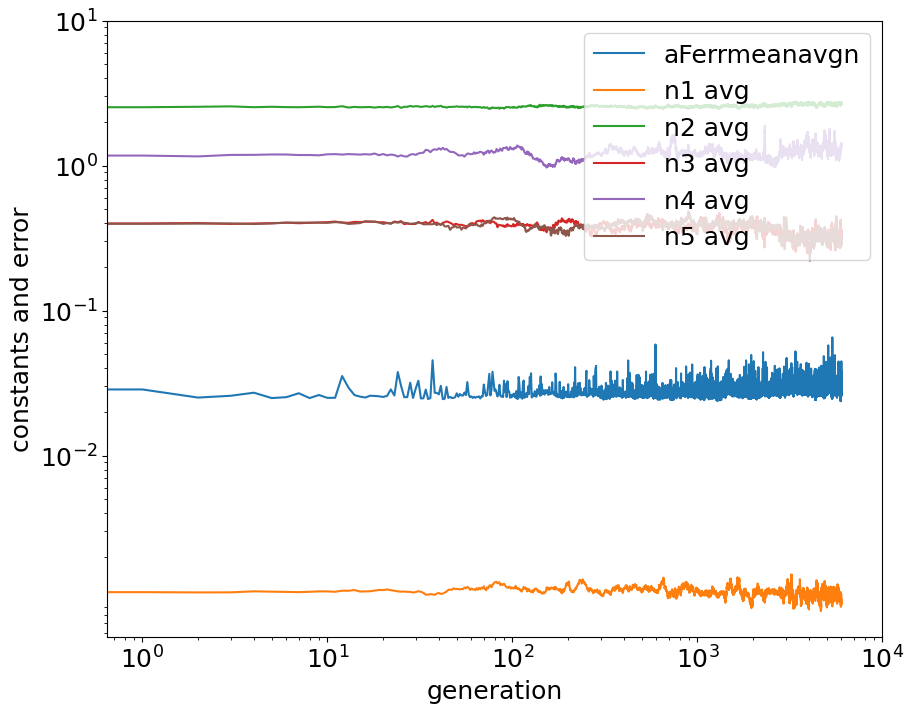

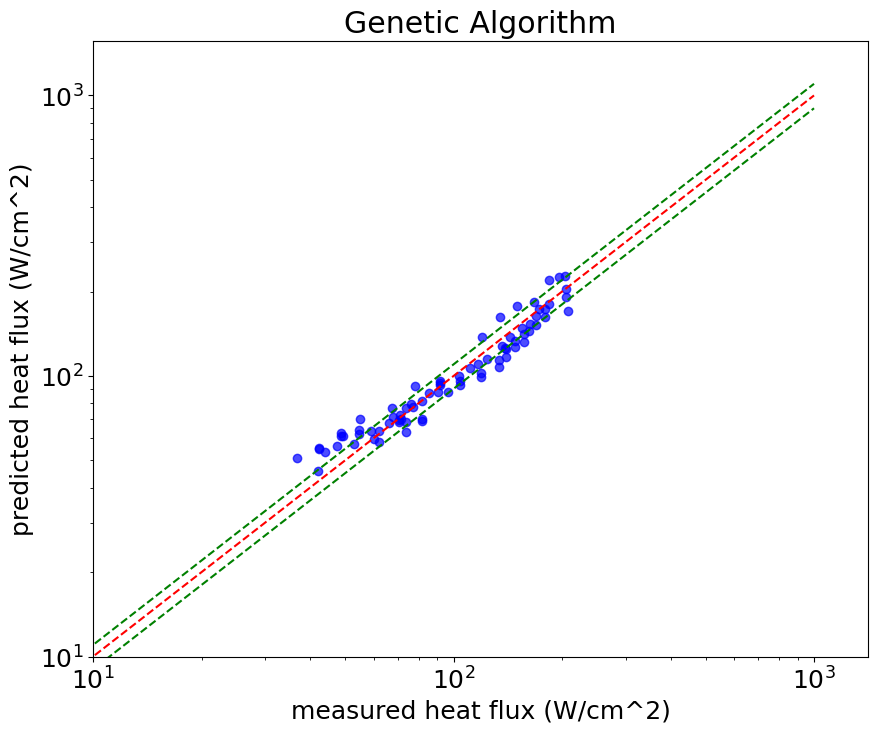

Results Table 1:
Set       n1i       n2i       n3i       n4i       n5i       p         NGEN      RMSE      MAE       
1         0.00110   2.500     0.400     1.160     0.400     0.09      6000      13.79     0.0237    
Results Table 2:
Set       n1min     n2min     n3min     n4min     n5min     p         NGEN      RMSE      MAE       
1         0.00093   2.624     0.416     1.269     0.310     0.09      6000      13.79     0.0237    
Results Table 3:
Set       n1avg[k]  n2avg[k]  n3avg[k]  n4avg[k]  n5avg[k]  p         NGEN      RMSE      MAE       
1         0.00109   2.632     0.341     1.387     0.323     0.09      6000      13.79     0.0237    


In [235]:
'''INITIALIZING PARAMETERS'''
# Define a list of n values, perturbation, and NGEN to evaluate
n_values_to_evaluate = [
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.09, 6000], # Given Initial guess
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.2, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.3, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.4, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.5, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.6, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.7, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.8, 6000],
#     [(-1, 0.000476, 3.028, 0.2249, 1.054, 0.217), 0.9, 6000],

    
    [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000], # Best Initial guess found
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
#     [(-1, 0.0011, 2.5, 0.4, 1.16, 0.4), 0.09, 6000],
]

results = []  # Create an empty list to store summaries

for n_values, perturbation, NGEN in n_values_to_evaluate:
    
    n = []
    ntemp = []
    gen=[0]
    n1avg = [0.0]
    n2avg = [0.0]
    n3avg = [0.0]
    n4avg = [0.0]
    n5avg = [0.0]
    meanAFerr=[0.0]
    aFerrmeanavgn=[0.0] 
    rms_dev = [0.0] # Define RMSE

    # Set program parameters
    NGEN = NGEN      # number of generations (steps)
    MFRAC = 0.5   # faction of median threshold
    perturbation = perturbation # pertubation value

    # here the number of data vectors equals the number of DNA strands (or organisms)
    # they can be different if they are randomly paired to compute Ferr (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array stores the
        meanAFerr.append(0.0)
        aFerrmeanavgn.append(0.0)
        n1avg.append(0.0)
        n2avg.append(0.0)
        n3avg.append(0.0)
        n4avg.append(0.0)
        n5avg.append(0.0)

    '''guesses for initial solution population'''
    n0i, n1i, n2i, n3i, n4i, n5i = n_values

    #- initialize arrays before start of evolution loop EL
    #then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

    #i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
    n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
    for i in range(ND):
        n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
    #print (n) # uncomment command to print array so it can be checked

    # store also in wtemp
    ntemp = deepcopy(n)

    #initialize Ferr values an dother loop parameters
    #define arrays of Ferr (error) functions
    #individual solution error and absoute error
    Ferr =  [[0.0]]  
    #population average solution error and absoute error
    Ferravgn =  [[0.0]]
    aFerr =  [[0.0]]
    aFerravgn =  [[0.0]]

    #store zeros in ND genes
    for i in range(ND-1):
        #individual solution error and absoute error
        Ferr.append([0.0])
        aFerr.append([0.0])
        #population average solution error and absoute error
        Ferravgn.append([0.0])
        aFerravgn.append([0.0])
        rms_dev.append([0.0])
    #print (Ferr)

    aFerrmeanavgnMin = 1000000000.0 
    # these store the  n values for minimum population average error durng NGEN generations
    n1min = 0.0
    n2min = 0.0
    n3min = 0.0
    n4min = 0.0
    n5min = 0.0
    aFerrta = 0.0
    # these store the time averaged n values durng from generation 800 to NGEN generations
    n1min = 0.0
    n1ta = 0.0
    n2ta = 0.0
    n3ta = 0.0
    n4ta = 0.0
    n5ta = 0.0

    '''START OF EVOLUTION LOOP'''
    # ------------------------------------------
    # k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
    for k in range(NGEN):

        '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
        number of data points ND so for each generation, each solution can be compared to a different 
        data point and all the data is compared in each generation.  The order of the solutions in the array 
        that holds the solution constants is constantly changing due to mating and selection, so the pairing 
        is random.'''

        '''CALCULATING ERROR (FITNESS)
        In this program, the absolute error in the logrithm of the physical heat flux is 
        used to evaluate fitness.'''

        # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
        # for specified n(i), and calculate (mean aFerr) = aFerrmean
        # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
        # Note that the number data points ND equals the number of solutions (organisms) in the population
        #====================================================================================
        '''CALCULATING ERROR (FITNESS)'''
        for i in range(ND):
            
            # =============================================================================
            # New function error equation to accomodate for 5 variable equation
            Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
            Ferr[i] = Ferr[i] + n[i][3] * math.log( ydata[i][2] + n[i][4]*9.8*ydata[i][3] )
            Ferr[i] = Ferr[i] + n[i][5] * lydata[i][4]
            # =============================================================================
            aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
        #-------------
        aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
        meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
        aFerrmedian = numpy.median(aFerr) #median error for population for this generation

        '''SELECTION'''
        #pick survivors 
        #[2] calculate survival cutoff, set number kept = nkeep = 0
        #==============================================
        clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
        nkeep = 0

        # now check each organism/solution to see if aFerr is less than cut of limit
        #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
        #and number of new offspring = NS-nkeep
        #==============================================
        for j in range(NS):  # NS Ferr values, one for each solution in population
            if (aFerr[j] < clim):
                nkeep = nkeep + 1
                #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
                ntemp[nkeep-1][1] = n[j][1];
                ntemp[nkeep-1][2] = n[j][2];
                ntemp[nkeep-1][3] = n[j][3];
                ntemp[nkeep-1][4] = n[j][4];
                ntemp[nkeep-1][5] = n[j][5];
        #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
        #compute number to be added by mating
        nnew = NS - nkeep  

        '''MATING'''
        #[4] for nnew new organisms/solutions,
        # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
        #==============================================================
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = numpy.random.randint(low=0, high=nkeep+1)
            nmate2 = numpy.random.randint(low=0, high=nkeep+1)

            #then randomly pick DNA from parents for offspring

            '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
            #if (numpy.random.rand() < 0.5)
            #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
            #else
            #    ntemp[nkeep+j+1][0] = n[nmate2][0]
            
            # ===================================================================
            # Change to original code. 0.09 substitute by "perturbation" variable
            # ===================================================================

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 1, mutation added
            else:
                ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+perturbation*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 2, mutation added
            else:
                ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+perturbation*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
            else:
                ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+perturbation*2.*(0.5-numpy.random.rand()))
               
            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
            else:
                ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+perturbation*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+perturbation*2.*(0.5-numpy.random.rand()))
            
        #=============================================
        n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)


        '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
        # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
        # at this generation k
        #=============================================
        #initialize average n's to zero and sum contribution of each member of the solution population 
        n1avg[k] = 0.0;
        n2avg[k] = 0.0;
        n3avg[k] = 0.0;
        n4avg[k] = 0.0;
        n5avg[k] = 0.0;
        for j in range(NS):    
            n1avg[k] = n1avg[k] + n[j][1]/NS; 
            n2avg[k] = n2avg[k] + n[j][2]/NS; 
            n3avg[k] = n3avg[k] + n[j][3]/NS;
            n4avg[k] = n4avg[k] + n[j][4]/NS;
            n5avg[k] = n5avg[k] + n[j][5]/NS;

        # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
        # for this solutions generation k
        # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
        # 
        #=============================================
        ''' CALCULATING MEAN ERROR FOR POPULATION'''
        for i in range(ND): 
            
            # =============================================================================
            # New average function error equation to accomodate for 5 variable equation
            Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
            Ferravgn[i] = Ferravgn[i] + n3avg[k] * math.log( ydata[i][2] + n4avg[k]*9.8*ydata[i][3] ) 
            Ferravgn[i] = Ferravgn[i] + n5avg[k] * math.log(ydata[i][4])
            # =============================================================================

            aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
        #-------------
        aFerrmeanavgn[k] = numpy.mean(aFerravgn)

        # next, update time average of n valaues in population (n1ta[k], etc.) 
        # for generations = k > 800 up to total NGEN
        #=============================================
        aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
        if (k > 800):
            n1ta = n1ta + n1avg[k]/(NGEN-800)
            n2ta = n2ta + n2avg[k]/(NGEN-800)
            n3ta = n3ta + n3avg[k]/(NGEN-800)
            n4ta = n4ta + n4avg[k]/(NGEN-800)
            n5ta = n5ta + n5avg[k]/(NGEN-800)

        # compare aFerrmeanavgn[k] to previous minimum value and save 
        # it and corresponding n(i) values if the value for this generation k is lower 
        #=============================================
        if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
            aFerrmeanavgnMin = aFerrmeanavgn[k] 
            n1min = n1avg[k]
            n2min = n2avg[k]
            n3min = n3avg[k]
            n4min = n4avg[k]
            n5min = n5avg[k]

        #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
        #print ('kvalue =', k)
        '''end of evolution loop'''
        # ------------------------------------------------------------------
        # ------------------------------------------------------------------


    # ------------------------------------------------------------------
    #final print and plot of results
    # ------------------------------------------------------------------
    print('Initial Values:', n1i, n2i, n3i, n4i, n5i)
    print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], n5avg[k], aFerrmeanavgn[k])
    print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, n4min , n5min, aFerrmeanavgnMin)
    print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, n4ta, n5ta, aFerrta)

    #SETTING UP PLOTS

    # ==================================================================
    # Change to original code. Calculating q" predicted and RMSE with
    # respect to the data q"
    # ==================================================================
    #initialize values
    qpppred =  [[0.0]]
    qppdata =  [[0.0]]
    for i in range(ND-1):
        qpppred.append([0.0])
        qppdata.append([0.0])   
    #calculate predicted and data values to plot
    for i in range(ND):
        qpppred[i] = n1min * (ydata[i][1]**n2min) * ((ydata[i][2] + n4min*9.8*ydata[i][3])**n3min) * (ydata[i][4])**n5min 
        qppdata[i] = ydata[i][0] 
    #Calculationg RMS btw qppdata and qpppred
    for i in range(ND):
        rms_dev[i] = (numpy.array(qppdata[i]) - numpy.array(qpppred[i]))**2
    rms_dev = numpy.sqrt(numpy.sum(rms_dev) / ND)

    print('RMS error: ', rms_dev)
    
    # ==================================================================
    # Change to original code. After calculating n1min, n2min, n3min, 
    # n4min, n5min and rms_dev, create a dictionary to store these values
    # ==================================================================
    # After calculating n1min, n2min, n3min, and rms_dev, create a dictionary 
    # to store these values
    iteration_result = {
        'Set': len(results) + 1,
        'n1i': n1i,
        'n2i': n2i,
        'n3i': n3i,
        'n4i': n4i,
        'n5i': n5i,
        'n1min': n1min,
        'n2min': n2min,
        'n3min': n3min,
        'n4min': n4min,
        'n5min': n5min,
        'n1avg[k]' : n1avg[k],
        'n2avg[k]' : n2avg[k],
        'n3avg[k]' : n3avg[k],
        'n4avg[k]' : n4avg[k],
        'n5avg[k]' : n5avg[k],
        'p': perturbation,
        'NGEN': NGEN,
        'rms_dev': rms_dev,
        'aFerrmeanavgnMin': aFerrmeanavgnMin,
        # Add more values as needed
    }
        
    results.append(iteration_result)  # Append the summary dictionary to the list
    #========

    # constants evolution plots
    # x axis values are generation number 
    # corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
    # plotting the points  

    plt.rcParams.update({'font.size': 18})

    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # computed using the mean n values
    plt.plot(gen, aFerrmeanavgn) 
    plt.plot(gen, n1avg)
    plt.plot(gen, n2avg)
    plt.plot(gen, n3avg)
    plt.plot(gen, n4avg)
    plt.plot(gen, n5avg)
    plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

    # naming the x axis 
    plt.xlabel('generation') 
    # naming the y axis 
    plt.ylabel('constants and error') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000]) 
    plt.show() 


    '''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
    
    # ============================================================================
    # Change to original code. Adding perfect algorithm prediction reference line
    # and +/-10% uncertainty boundaries
    # ============================================================================
    x_values = numpy.logspace(0, 3, 100)   # Adjust the range of x values as needed
    y_values = x_values                     # y = k*x
    y_values1 = x_values + (0.1 * x_values) # y = k*x + 0.1*x (+10% uncertainty)
    y_values2 = x_values - (0.1 * x_values) # y = k*x - 0.1*x (-10% uncertainty)
    # Plot reference equations
    plt.plot(x_values, y_values1, color='green', linestyle='--', label='y = k*x + 0.1*x')
    plt.plot(x_values, y_values2, color='green', linestyle='--', label='y = k*x - 0.1*x')
    plt.plot(x_values, y_values, color='red', linestyle='--', label='y = k*x')
    # Plot Heat Flux predicted vs. data
    plt.scatter(qppdata, qpppred, label='Data', color='blue', alpha=0.7)
    plt.title('Genetic Algorithm')
    plt.xlabel('measured heat flux (W/cm^2)')
    plt.ylabel('predicted heat flux (W/cm^2)')
    plt.loglog()
    plt.xlim(xmin = 10)
    plt.ylim(ymin = 10)

    plt.show()
    
# Table of Results
print("Results Table 1:")
# print(f"{'Set':<10}{'n1i':<10}{'n2i':<10}{'n3i':<10}{'n4i':<10}{'n5i':<10}{'n1min':<10}{'n2min':<10}{'n3min':<10}{'n4min':<10}{'n5min':<10}{'p':<10}{'NGEN':<10}{'rms_dev':<10}")
# for result in results:
#     print(f"{result['Set']:<10}{result['n1i']:<10.5f}{result['n2i']:<10.3f}{result['n3i']:<10.3f}{result['n4i']:<10.3f}{result['n5i']:<10.3f}{result['n1min']:<10.5f}{result['n2min']:<10.2f}{result['n3min']:<10.3f}{result['n4min']:<10.2f}{result['n5min']:<10.3f}{result['p']:<10.2f}{result['NGEN']:<10}{result['rms_dev']:<10.2f}")

print(f"{'Set':<10}{'n1i':<10}{'n2i':<10}{'n3i':<10}{'n4i':<10}{'n5i':<10}{'p':<10}{'NGEN':<10}{'RMSE':<10}{'MAE':<10}")
for result in results:
    print(f"{result['Set']:<10}{result['n1i']:<10.5f}{result['n2i']:<10.3f}{result['n3i']:<10.3f}{result['n4i']:<10.3f}{result['n5i']:<10.3f}{result['p']:<10.2f}{result['NGEN']:<10}{result['rms_dev']:<10.2f}{result['aFerrmeanavgnMin']:<10.4f}")
    
print("Results Table 2:")
print(f"{'Set':<10}{'n1min':<10}{'n2min':<10}{'n3min':<10}{'n4min':<10}{'n5min':<10}{'p':<10}{'NGEN':<10}{'RMSE':<10}{'MAE':<10}")
for result in results:
    print(f"{result['Set']:<10}{result['n1min']:<10.5f}{result['n2min']:<10.3f}{result['n3min']:<10.3f}{result['n4min']:<10.3f}{result['n5min']:<10.3f}{result['p']:<10.2f}{result['NGEN']:<10}{result['rms_dev']:<10.2f}{result['aFerrmeanavgnMin']:<10.4f}")

print("Results Table 3:")
print(f"{'Set':<10}{'n1avg[k]':<10}{'n2avg[k]':<10}{'n3avg[k]':<10}{'n4avg[k]':<10}{'n5avg[k]':<10}{'p':<10}{'NGEN':<10}{'RMSE':<10}{'MAE':<10}")
for result in results:
    print(f"{result['Set']:<10}{result['n1avg[k]']:<10.5f}{result['n2avg[k]']:<10.3f}{result['n3avg[k]']:<10.3f}{result['n4avg[k]']:<10.3f}{result['n5avg[k]']:<10.3f}{result['p']:<10.2f}{result['NGEN']:<10}{result['rms_dev']:<10.2f}{result['aFerrmeanavgnMin']:<10.4f}")
 
# end CodeP1.2F23 


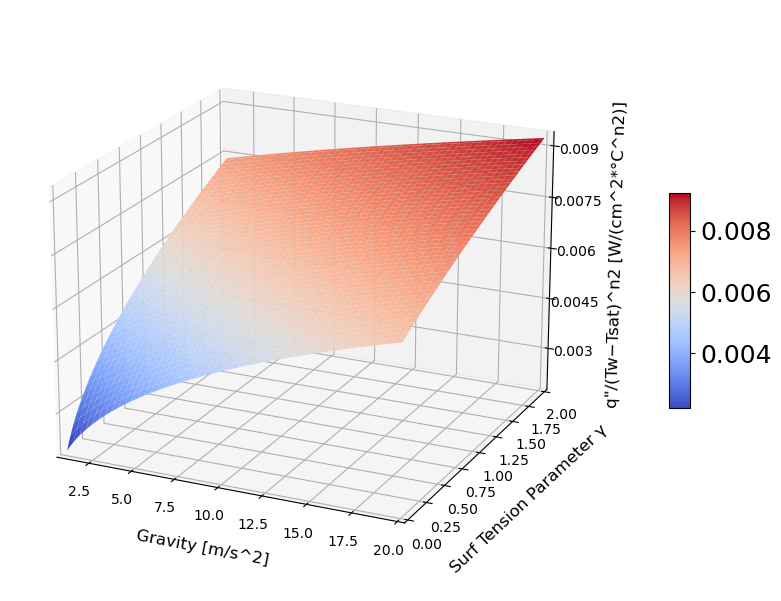

In [246]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FuncFormatter, MaxNLocator

# Define a custom formatting function to round to a specific number of significant figures
def format_z(value, _):
    # Specify the number of significant figures you want (e.g., 3)
    num_significant_figures = 3
    return f"{value:.{num_significant_figures}g}"
    
# Define the range of X and Y values
X = numpy.linspace(1,20,100) # Gravity
Y = numpy.linspace(0,2,100)  # Surface tension parameter
X, Y = numpy.meshgrid(X, Y)

# Calculate Z using your equation
Z = n1min * ((X + n4min * 9.8 * Y) ** n3min) * (10 ** n5min)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
fig.colorbar(surf, shrink=0.35, aspect=10, pad=0.1)

# Set labels for the axes
ax.set_xlabel('Gravity [m/s^2]', fontsize=12, labelpad=10)
ax.set_ylabel('Surf Tension Parameter γ', fontsize=12, labelpad=10)
ax.set_zlabel('q"/(Tw−Tsat)^n2 [W/(cm^2*°C^n2)]', fontsize=12, labelpad=10)

# Set limits for the axes
ax.set_xlim(1.0, 20.0)
ax.set_ylim(0.0, 2.0)
# ax.set_zlim(0.001, 0.003)

# ax.zaxis.set_major_locator(LinearLocator(10))
# Reduce the number of ticks on the z-axis
ax.zaxis.set_major_locator(MaxNLocator(nbins=5))

# Customize tick formatting for z-axis using the custom formatting function
ax.zaxis.set_major_formatter(FuncFormatter(format_z))

# Customize tick formatting for z-axis
ax.tick_params(axis='both', which='major', labelsize=10)

# Set the view perspective to orient the plot
ax.view_init(elev=20, azim=-65)  # Adjust the angles as needed

# Show the plot
plt.show()